In [1]:
!nvidia-smi --query-gpu=name,memory.total,memory.free --format=csv,noheader

NVIDIA A100-PCIE-40GB, 40960 MiB, 40513 MiB
NVIDIA A100-PCIE-40GB, 40960 MiB, 25612 MiB
NVIDIA A100-PCIE-40GB, 40960 MiB, 40513 MiB


In [2]:
import torch
import os
import matplotlib.pyplot as plt
from diffusers import StableDiffusionPipeline
from transformers import CLIPFeatureExtractor, CLIPTextModel, CLIPTokenizer

pretrained_model_name_or_path = "/root/autodl-tmp/stable_diffusion/stable-diffusion-v1-5"
learned_embeds_path = "/root/autodl-tmp/textual_inversion/trained_embeddings/custom_chair/regression/learned_embeds.bin"
all_embedding_path = os.path.dirname(learned_embeds_path)
dataset_path, _ = os.path.split(all_embedding_path)
_, dataset_name = os.path.split(dataset_path)
dist_type = "Vector_dot"

tokenizer = CLIPTokenizer.from_pretrained(
    pretrained_model_name_or_path,
    subfolder="tokenizer",
)
text_encoder = CLIPTextModel.from_pretrained(
    pretrained_model_name_or_path, 
    subfolder="text_encoder",
)

/root/miniconda3/envs/dushian/lib/python3.8/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [3]:
loaded_learned_embeds = torch.load(learned_embeds_path, map_location="cpu")

# Get trained_token, weights and ids
trained_token = list(loaded_learned_embeds.keys())[0]
_, weight_vector, _, vocab_ids = list(loaded_learned_embeds.values())
neighbour_word_list = tokenizer.convert_ids_to_tokens(vocab_ids)

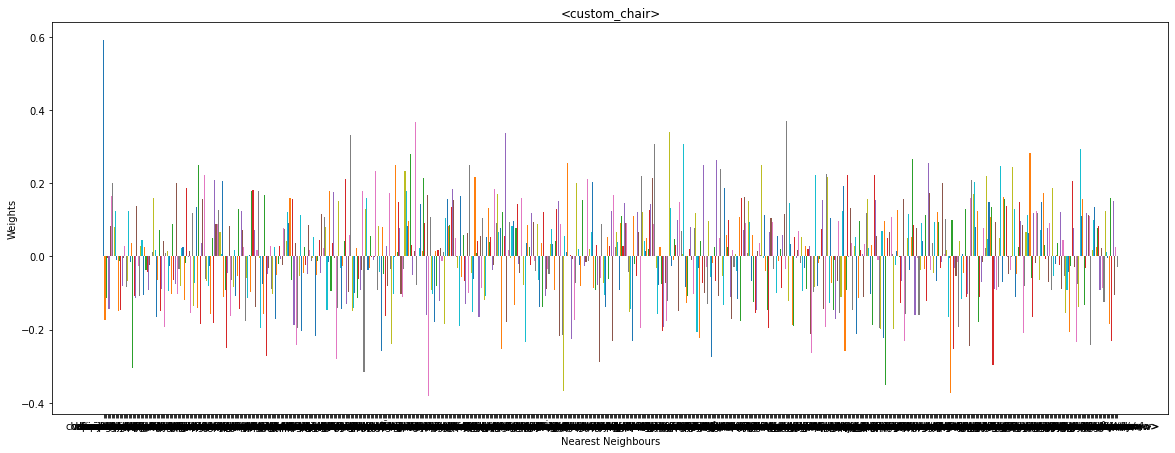

In [8]:
# plot the weights and neighbour_word using histogram
plt.title(trained_token)
plt.xlabel("Nearest Neighbours")
plt.ylabel("Weights")
plt.rcParams['figure.figsize']=(20, 7.2)

for i in range(len(neighbour_word_list)):
    plt.bar(neighbour_word_list[i], weight_vector.squeeze(1)[i].item())
plot_candidate_dir = f"{all_embedding_path}/plot_candidate"
os.makedirs(plot_candidate_dir, exist_ok=True)
plt.savefig(f"{plot_candidate_dir}/original.png")
plt.show()